In [54]:
from zipfile import ZipFile
file_name = "dataset.zip"
 
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done !")

Done !


# `Remove the file`

In [55]:
#rm -rf dataset

# `Imported the needed packages`

In [56]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

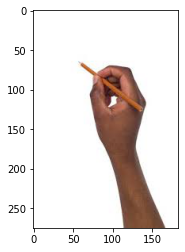

In [57]:
img= image.load_img("dataset/training/black_hand/34.jpg")
plt.imshow(img)

In [58]:
cv2.imread("dataset/training/black_hand/34.jpg").shape

(275, 183, 3)

# Rescaling the image dataset's

In [59]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

# Train and Validation data location fixed

In [60]:
train_dataset = train.flow_from_directory(
    'dataset/training/',
    target_size=(200,200),
    batch_size = 3,
    class_mode = 'binary')

validation_dataset = validation.flow_from_directory(
    'dataset/validation/',
    target_size=(200,200),
    batch_size = 3,
    class_mode = 'binary')
test_dataset = validation.flow_from_directory(
    'dataset/testing/',
    target_size=(200,200),
    batch_size = 3,
    class_mode = 'binary')

Found 86 images belonging to 2 classes.
Found 35 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [61]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(132,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    
                                    tf.keras.layers.Dense(1, activation='sigmoid'),   #softmax
])

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 132)       19140     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 132)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        76096     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)            

# Compile The model

In [63]:
model.compile(loss = 'binary_crossentropy',  #categorical_crossentropy
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

# Fit the model with respect to training and validation data

In [64]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=3,
                      epochs= 50,
                      validation_data = validation_dataset)

Epoch 1/50
3/3 [==============================] - 3s 933ms/step - loss: 7.1843 - accuracy: 0.6528 - val_loss: 3.4000 - val_accuracy: 0.4286
Epoch 2/50
3/3 [==============================] - 2s 852ms/step - loss: 2.3597 - accuracy: 0.5417 - val_loss: 5.8270 - val_accuracy: 0.4286
Epoch 3/50
3/3 [==============================] - 2s 839ms/step - loss: 3.9711 - accuracy: 0.4444 - val_loss: 0.3881 - val_accuracy: 0.8571
Epoch 4/50
3/3 [==============================] - 2s 850ms/step - loss: 0.2561 - accuracy: 0.9444 - val_loss: 0.5928 - val_accuracy: 0.6286
Epoch 5/50
3/3 [==============================] - 2s 834ms/step - loss: 0.2142 - accuracy: 0.8194 - val_loss: 0.2862 - val_accuracy: 0.9143
Epoch 6/50
3/3 [==============================] - 2s 851ms/step - loss: 0.0874 - accuracy: 1.0000 - val_loss: 0.2437 - val_accuracy: 0.8857
Epoch 7/50
3/3 [==============================] - 2s 849ms/step - loss: 0.2374 - accuracy: 0.8889 - val_loss: 3.9086 - val_accuracy: 0.4286
Epoch 8/50
3/3 [====

In [65]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test_dataset)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

2/2 [==============================] - 0s 59ms/step - loss: 0.0110 - accuracy: 1.0000
Accuracy: 1.0
Loss: 0.011021475307643414


In [66]:
print(model_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Model Accuracy

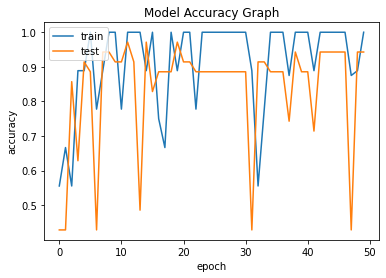

In [67]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title("Model Accuracy Graph")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model Loss Graph

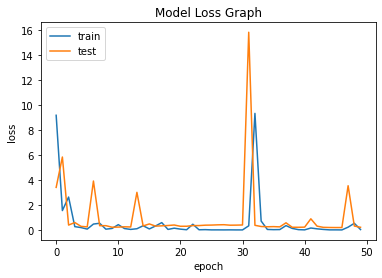

In [68]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title("Model Loss Graph")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
validation_dataset.class_indices

{'black_hand': 0, 'white_hand': 1}

# Predict the test data

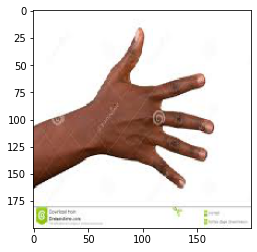

Black Hand !


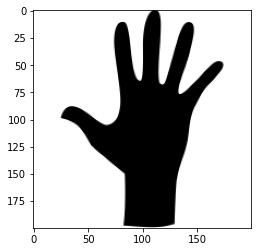

Black Hand !


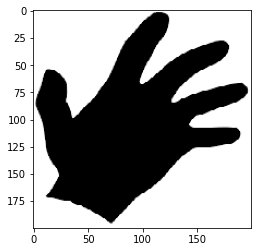

Black Hand !


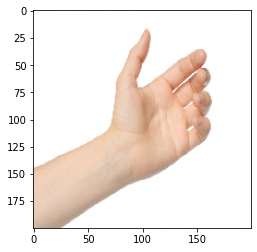

White Hand !


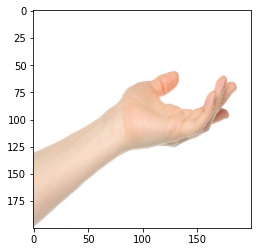

White Hand !


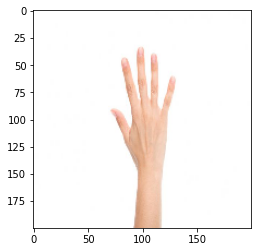

White Hand !


In [70]:
dir_path = 'dataset/test'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+"//"+i, target_size=(200,200,3))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print("Black Hand !")
  elif val == 1:
    print("White Hand !")